In [ ]:
pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc, average_precision_score, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import QuantileTransformer, StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from catboost import CatBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv('machine_failure_data.csv')
df.head()

,Date,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,...,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm,Failure_today,RISK_MM,Fail_tomorrow
0,2008-12-01,3,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,3,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,3,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,3,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
df.shape

(142193, 24)

In [ ]:
df.describe()

,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Speed,Parameter3_9am,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm,RISK_MM
count,142193.000000,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,24.740655,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,14.237503,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,1.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,12.000000,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,25.000000,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,37.000000,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,49.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [ ]:
df.columns

Index(['Date', 'Location', 'Min_Temp', 'Max_Temp', 'Leakage', 'Evaporation',
       'Electricity', 'Parameter1_Dir', 'Parameter1_Speed', 'Parameter2_9am',
       'Parameter2_3pm', 'Parameter3_9am', 'Parameter3_3pm', 'Parameter4_9am',
       'Parameter4_3pm', 'Parameter5_9am', 'Parameter5_3pm', 'Parameter6_9am',
       'Parameter6_3pm', 'Parameter7_9am', 'Parameter7_3pm', 'Failure_today',
       'RISK_MM', 'Fail_tomorrow'],
      dtype='object')

In [ ]:
df.isnull().mean()*100

Date                 0.000000
Location             0.000000
Min_Temp             0.447983
Max_Temp             0.226453
Leakage              0.988797
Evaporation         42.789026
Electricity         47.692924
Parameter1_Dir       6.561504
Parameter1_Speed     6.519308
Parameter2_9am       7.041838
Parameter2_3pm       2.656952
Parameter3_9am       0.948007
Parameter3_3pm       1.849599
Parameter4_9am       1.247600
Parameter4_3pm       2.538803
Parameter5_9am       9.855619
Parameter5_3pm       9.832411
Parameter6_9am      37.735332
Parameter6_3pm      40.152469
Parameter7_9am       0.635756
Parameter7_3pm       1.917113
Failure_today        0.988797
RISK_MM              0.000000
Fail_tomorrow        0.000000
dtype: float64

In [ ]:
df['Fail_tomorrow'].value_counts()

Fail_tomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [ ]:
df.nunique()

Date                3436
Location              49
Min_Temp             389
Max_Temp             505
Leakage              679
Evaporation          356
Electricity          145
Parameter1_Dir        16
Parameter1_Speed      67
Parameter2_9am        16
Parameter2_3pm        16
Parameter3_9am        43
Parameter3_3pm        44
Parameter4_9am       101
Parameter4_3pm       101
Parameter5_9am       546
Parameter5_3pm       549
Parameter6_9am        10
Parameter6_3pm        10
Parameter7_9am       440
Parameter7_3pm       500
Failure_today          2
RISK_MM              681
Fail_tomorrow          2
dtype: int64

In [ ]:
#histogram
def histogram(x):
  n = len(x.columns)

  col = 3
  row = n//col + 1

  plt.figure(figsize = (15, 25))
  for i in range(n):
    plt.subplot(row, col, i+1)
    sns.histplot( x = x[x.columns[i]], bins=30, color='blue', edgecolor='black', kde=True)
    plt.xlabel(x.columns[i])
    plt.ylabel('Frequency')
  plt.show()

In [ ]:
#confusion matrix
def confusionMatrix(actual, prediction):
  conf_matrix = confusion_matrix(actual, prediction)
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

In [ ]:
def best_threshold(y_true, y_scores):
  roc_auc = roc_auc_score(y_true, y_scores)
  precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
  f1_scores = 2 * recall * precision / (recall + precision)
  threshold = thresholds[np.argmax(f1_scores)]
  return threshold

In [ ]:
def plot_roc_curve(y_true, y_prob):
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
def plot_pr_curve(y_true, y_prob):

    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_true, y_prob)

    # Plot PR curve
    plt.figure()
    plt.plot(recall, precision, color='b', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

In [ ]:
def boxplot(x):
  plt.figure(figsize = (15, 20))
  n = len(x.columns)
  cols = 3
  rows = n//cols + 1
  for i in range(n):
    plt.subplot(rows, cols, i+1)
    sns.boxplot( data = x[x.columns[i]])
  plt.show()

In [ ]:
def label(encoder, col, df):
  for i in col:
    df[i] = encoder.fit_transform(df[i])
  return df

In [ ]:
def remove_outliers_IQR(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

In [ ]:
#transform distributions
def quantile_transform(x, columns, max_samples = 10000):
  n_samples = min(len(x), max_samples)
  qt = QuantileTransformer(n_quantiles=n_samples, output_distribution='normal', random_state=0)
  for col in columns:
    x[col] = qt.fit_transform(x[[col]])

  return x

In [ ]:
def catBoost(X_train, Y_train, X_test, Y_test, features = None):
  cat = CatBoostClassifier(iterations=100, random_state=42, verbose=0)
  features = features
  cat.fit(X_train, Y_train,cat_features=features)

  Y_train_pred = cat.predict(X_train)
  Y_scores = cat.predict_proba(X_test)
  Y_test_pred = cat.predict(X_test)
  return Y_train_pred,Y_test_pred,Y_scores

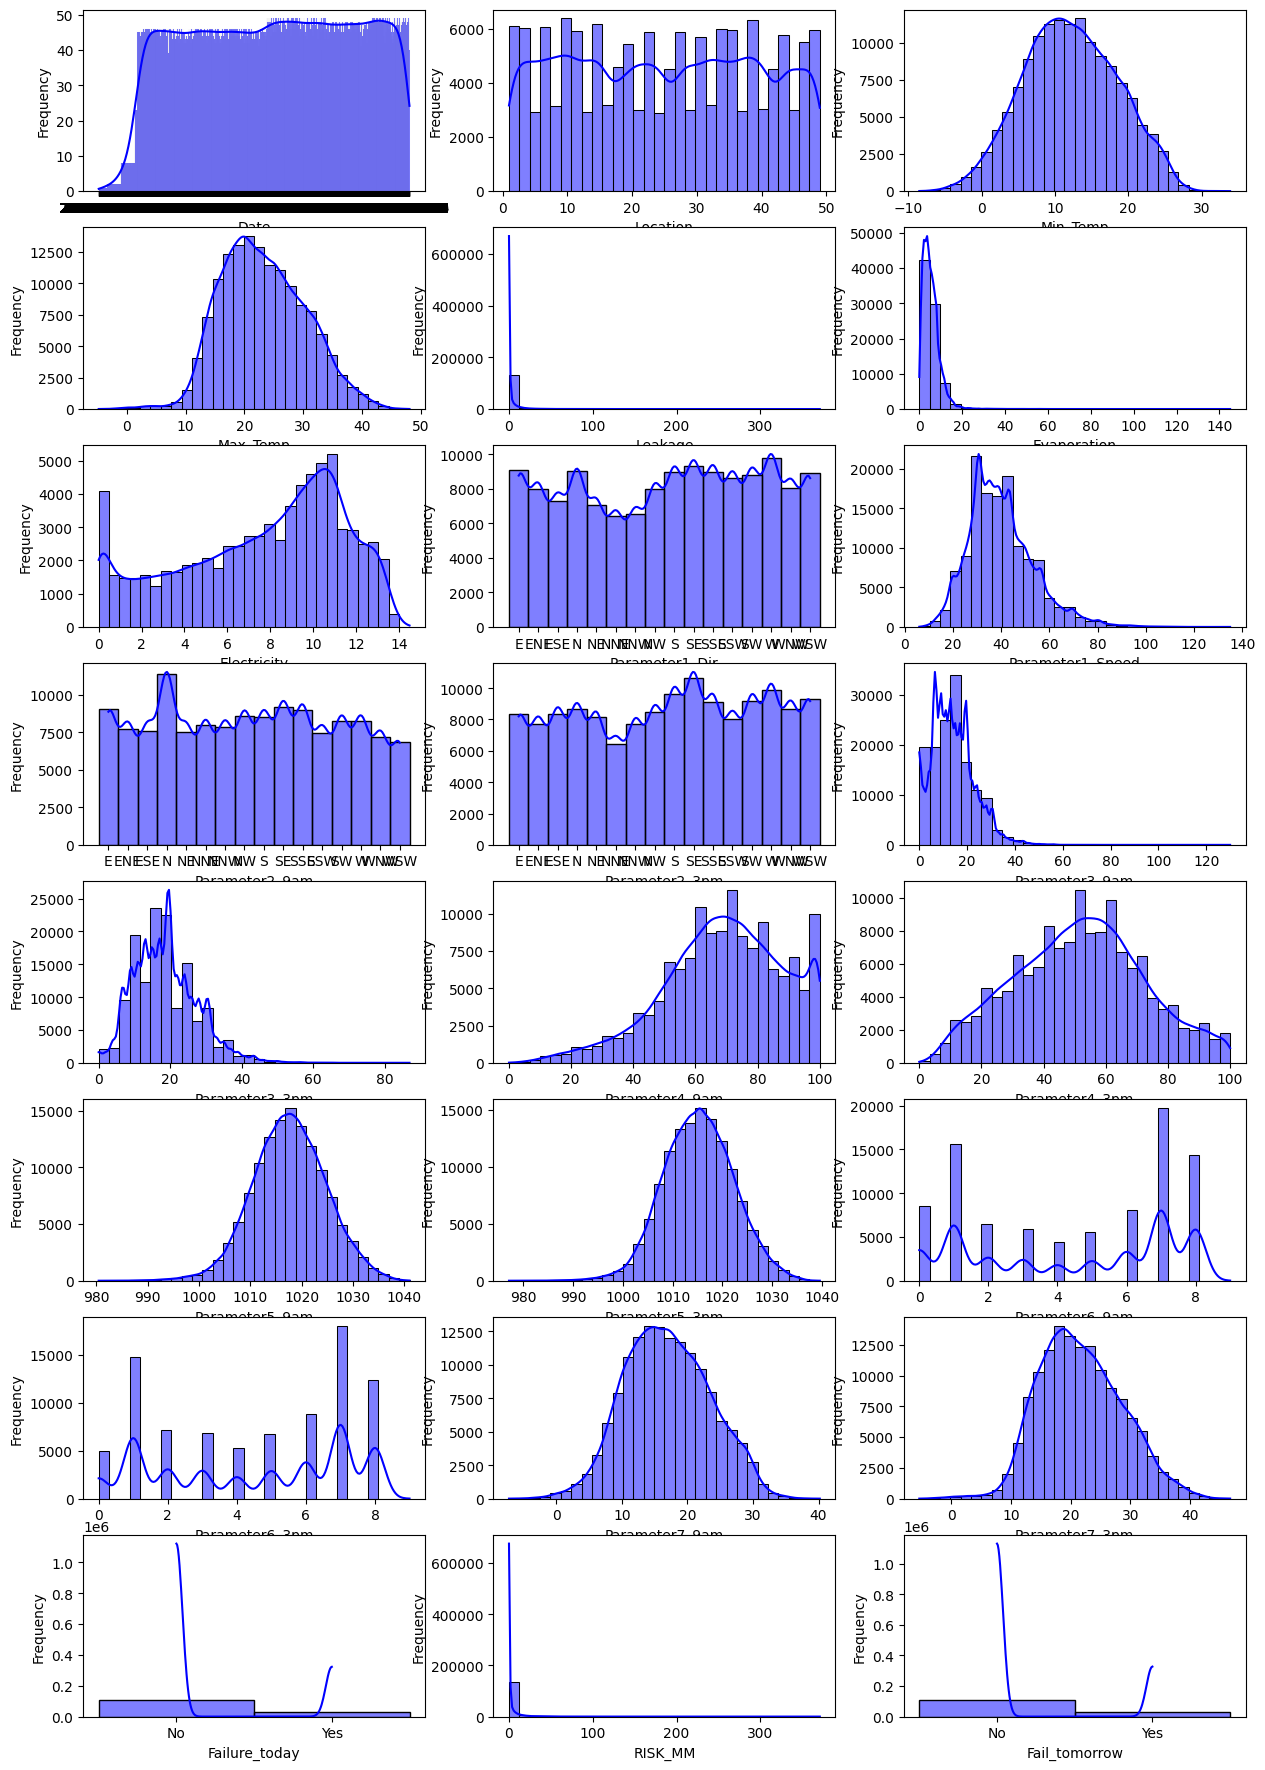

In [ ]:
histogram(df)

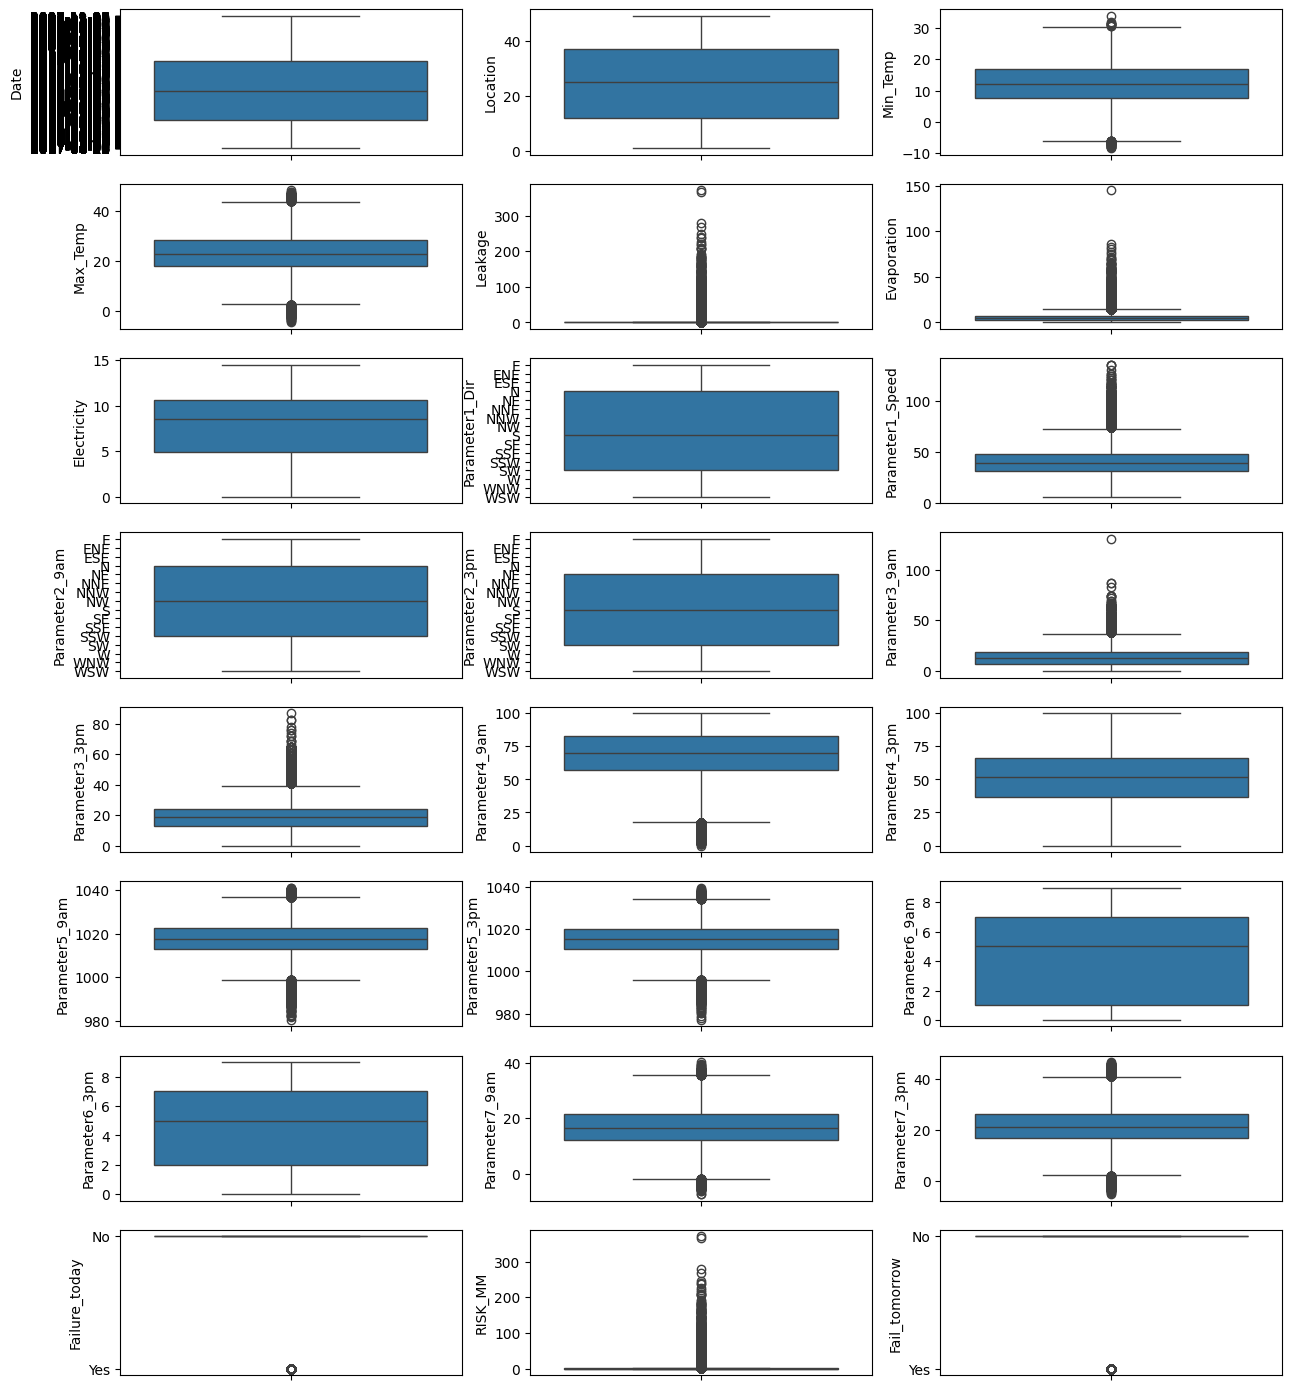

In [ ]:
boxplot(df)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df['Failure_today'] = df['Failure_today'].map({'Yes': 1, 'No': 0})
df['Fail_tomorrow'] = df['Fail_tomorrow'].map({'Yes': 1, 'No': 0})

cat_features = df.select_dtypes(include=['object', 'category']).columns
df[cat_features] = df[cat_features].astype(str)

# Fill NaN values in numerical columns with the mean of the column
num_features = df.select_dtypes(include=['float64', 'int64']).columns
df[num_features] = df[num_features].fillna(df[num_features].median())

In [ ]:
cat_features

Index(['Parameter1_Dir', 'Parameter2_9am', 'Parameter2_3pm'], dtype='object')

In [ ]:
X, y = df.drop(columns=['Fail_tomorrow']), df[['Fail_tomorrow']]

In [ ]:
labelEncoder = LabelEncoder()
y.loc[:, "Fail_tomorrow"]  = labelEncoder.fit_transform(y["Fail_tomorrow"])
y = y["Fail_tomorrow"].astype('int')

In [ ]:
overSampler = RandomOverSampler(sampling_strategy='auto')
X_overSampled, y_overSampled = overSampler.fit_resample(X, y)
df = pd.concat([pd.DataFrame(X_overSampled, columns=X.columns), pd.DataFrame(y_overSampled, columns=['Fail_tomorrow'])], axis=1)
# y_overSampled.value_counts()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42,stratify=y)

In [ ]:
X_train.shape

(113754, 23)

In [ ]:
y_pred_train, y_pred_test, y_test_prob = catBoost(X_train, y_train, X_test, y_test, cat_features.tolist())

print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test)}")

Train Accuracy: 1.0
Test Accuracy: 1.0


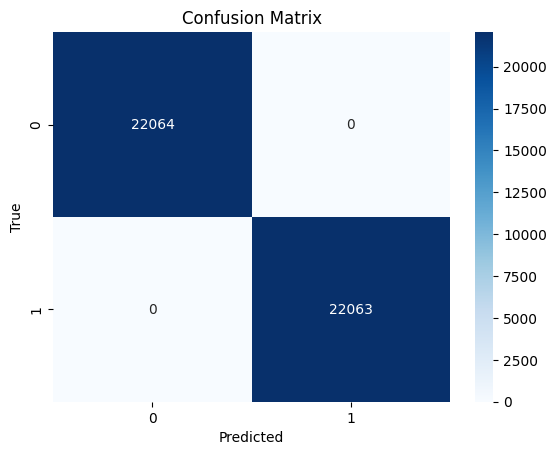

In [ ]:
confusionMatrix(y_test, y_pred_test)

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22064
           1       1.00      1.00      1.00     22063

    accuracy                           1.00     44127
   macro avg       1.00      1.00      1.00     44127
weighted avg       1.00      1.00      1.00     44127



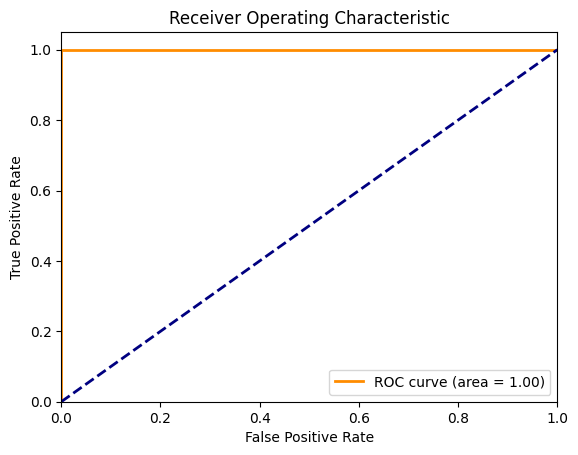

In [ ]:
plot_roc_curve(y_test, y_test_prob[:,1])

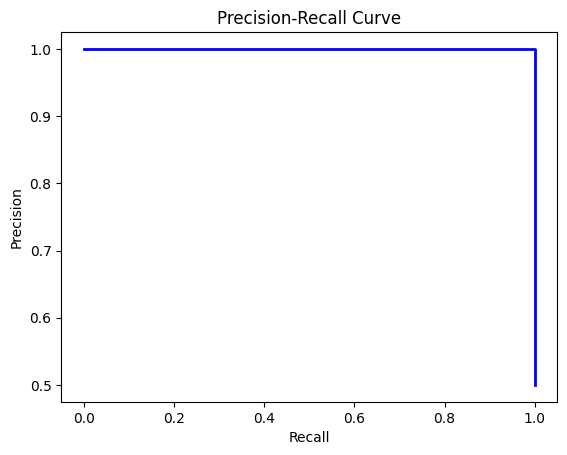

In [ ]:
plot_pr_curve(y_test, y_test_prob[:,1])